In [221]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
import warnings
import math


warnings.filterwarnings('ignore')
%matplotlib inline


In [222]:
df_data = pd.read_csv('./data/encirclement/AW_LPV_circle_2nd_sample.csv')

In [223]:
df_data.describe()

,MainVertexSeq,VertexID,X,Y,Z,VertexDepth,MeshScalar
count,1937.000000,1937.000000,1937.000000,1937.000000,1937.000000,1937.000000,1937.000000
mean,57.079504,12317.483738,8.216386,1.798817,17.123416,1.224058,115.098428
std,33.361002,3010.423881,5.486668,6.084261,10.419226,0.643129,15.529610
min,0.000000,6970.000000,-1.984740,-11.548700,-1.525560,0.000000,38.571400
25%,29.000000,9593.000000,4.341670,-3.096520,7.962980,1.000000,107.667000
50%,56.000000,12530.000000,6.888160,3.193480,17.575100,1.000000,116.600000
75%,86.000000,15041.000000,13.717800,7.158950,26.510900,1.000000,125.333000
max,115.000000,16678.000000,19.132800,9.916350,32.608600,3.000000,150.667000


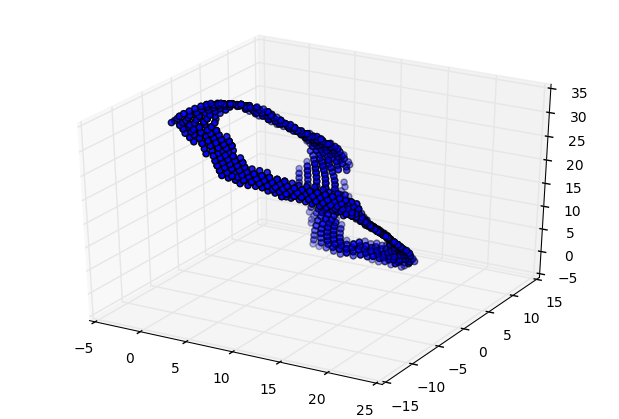

In [224]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(df_data['X'], df_data['Y'], df_data['Z'])
plt.show()

In [225]:
df_data_scalars = pd.concat([df_data['MainVertexSeq'], df_data['MeshScalar']], axis=1)

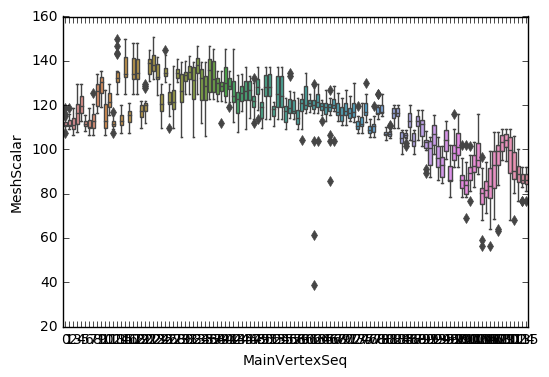

In [226]:
ax = sns.boxplot(x="MainVertexSeq", y="MeshScalar", data=df_data_scalars)

In [227]:
g1 = df_data.groupby(['MainVertexSeq']).median()
g1 = g1.reset_index()

In [228]:
g1.head(2)

,MainVertexSeq,VertexID,X,Y,Z,VertexDepth,MeshScalar
0,0,7459.5,7.670810,7.13175,0.282058,1.0,111.000
1,1,7460.5,8.506335,6.94489,0.462893,1.0,111.143


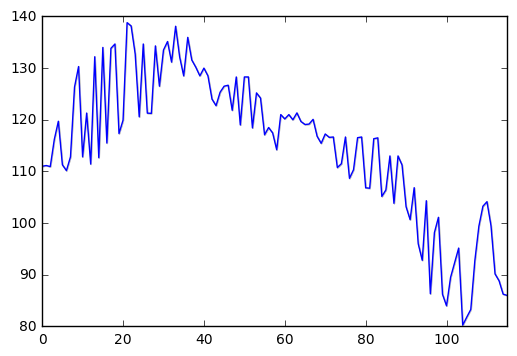

In [229]:
ax = sns.tsplot(data=g1['MeshScalar'])

In [230]:
center_data = [df_data['X'].mean(), df_data['Y'].mean(), df_data['Z'].mean()]

In [231]:
center_data

[8.216386276458444, 1.798816577542591, 17.12341566504904]

In [232]:
df_data_scalars = pd.concat([df_data['MainVertexSeq'], df_data['MeshScalar']], axis=1)

In [233]:
g1 = df_data.groupby(['MainVertexSeq']).median()
g1 = g1.reset_index()

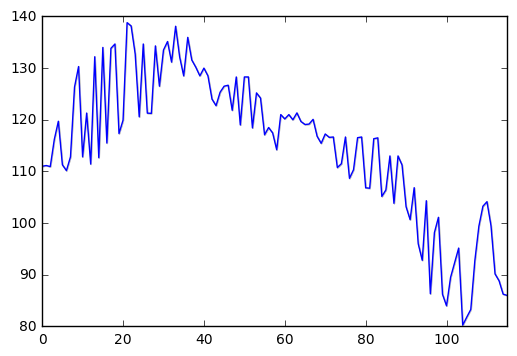

In [234]:
ax = sns.tsplot(data=g1['MeshScalar'])

In [235]:
def unit_vector(vector):
    """ Returns the unit vector of the vector.  """
    return vector / np.linalg.norm(vector)

def angle_between(v1, v2):
    """ Returns the angle in radians between vectors 'v1' and 'v2'::

            >>> angle_between((1, 0, 0), (0, 1, 0))
            1.5707963267948966
            >>> angle_between((1, 0, 0), (1, 0, 0))
            0.0
            >>> angle_between((1, 0, 0), (-1, 0, 0))
            3.141592653589793
    """
    v1_u = unit_vector(v1)
    v2_u = unit_vector(v2)
    return np.arccos(np.clip(np.dot(v1_u, v2_u), -1.0, 1.0))

In [236]:
def point_theta(center, A):
    thetas = []; 
    Ref_pt = [A.iloc[0]['X'], A.iloc[0]['Y'], A.iloc[0]['Z']] 
    for index, row in A.iterrows():
        pt = [row['X'], row['Y'], row['Z']]
        theta = angle_between(Ref_pt, pt)
        thetas.append(theta)
    return thetas


In [237]:
thetas = point_theta(center_data, df_data)

In [238]:
thetas_df = pd.Series(thetas, name='theta');

In [239]:
df_data_with_theta = pd.concat([df_data, thetas_df], axis=1)

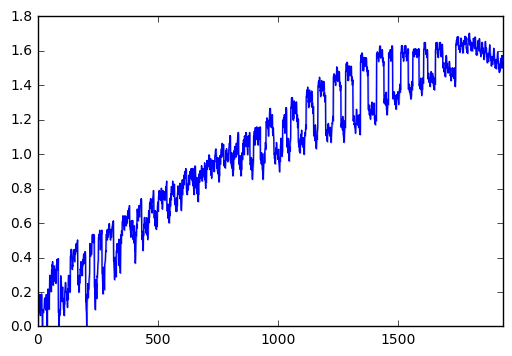

In [240]:
sns.tsplot(df_data_with_theta['theta'])

In [241]:
df_data_with_thetas_sorted = df_data_with_theta.sort_values(by='theta')

In [242]:
df_data_with_thetas_sorted.head(10)

,MainVertexSeq,VertexID,X,Y,Z,VertexDepth,MeshScalar,theta
0,0,7459,7.73005,7.13308,0.433021,0,111.286,0.000000
1,0,7459,7.73005,7.13308,0.433021,3,111.286,0.000000
88,5,7459,7.73005,7.13308,0.433021,2,111.286,0.000000
39,2,7459,7.73005,7.13308,0.433021,1,111.286,0.000000
20,1,7459,7.73005,7.13308,0.433021,2,111.286,0.000000
204,12,7459,7.73005,7.13308,0.433021,1,111.286,0.000000
92,5,7460,8.56311,6.94489,0.492765,1,112.400,0.063866
110,6,7460,8.56311,6.94489,0.492765,1,112.400,0.063866
40,2,7460,8.56311,6.94489,0.492765,1,112.400,0.063866
11,0,7460,8.56311,6.94489,0.492765,1,112.400,0.063866


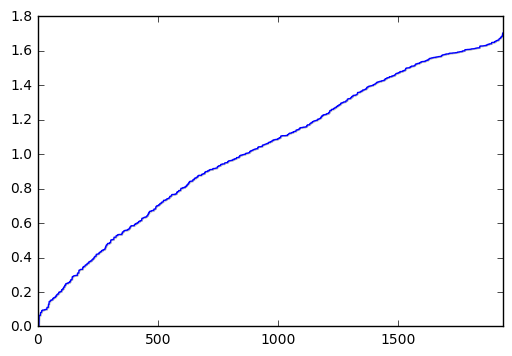

In [243]:
sns.tsplot(df_data_with_thetas_sorted['theta'])

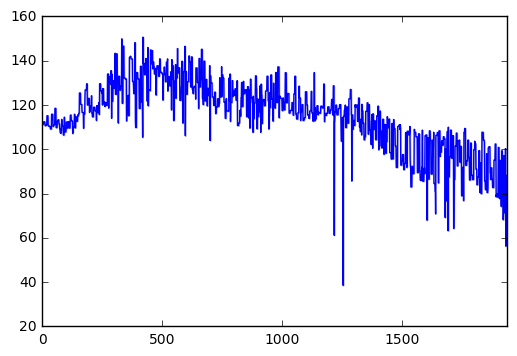

In [244]:
sns.tsplot(df_data_with_thetas_sorted['MeshScalar'])

In [245]:
df_data_with_thetas_sorted.head(15)

,MainVertexSeq,VertexID,X,Y,Z,VertexDepth,MeshScalar,theta
0,0,7459,7.73005,7.13308,0.433021,0,111.286,0.000000
1,0,7459,7.73005,7.13308,0.433021,3,111.286,0.000000
88,5,7459,7.73005,7.13308,0.433021,2,111.286,0.000000
39,2,7459,7.73005,7.13308,0.433021,1,111.286,0.000000
20,1,7459,7.73005,7.13308,0.433021,2,111.286,0.000000
204,12,7459,7.73005,7.13308,0.433021,1,111.286,0.000000
92,5,7460,8.56311,6.94489,0.492765,1,112.400,0.063866
110,6,7460,8.56311,6.94489,0.492765,1,112.400,0.063866
40,2,7460,8.56311,6.94489,0.492765,1,112.400,0.063866
11,0,7460,8.56311,6.94489,0.492765,1,112.400,0.063866


In [246]:
df_data_with_thetas_sorted['MeshScalar'].std()

15.529610008067298

In [247]:
df_data_with_thetas_sorted_nodupes = df_data_with_thetas_sorted.drop_duplicates(subset='VertexID', keep='last');

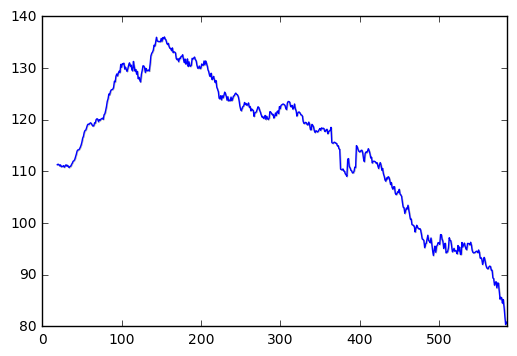

In [248]:
sns.tsplot(pd.rolling_mean(df_data_with_thetas_sorted_nodupes['MeshScalar'],20))

In [249]:
df_data_with_thetas_sorted_nodupes.describe()

,MainVertexSeq,VertexID,X,Y,Z,VertexDepth,MeshScalar,theta
count,587.000000,587.00000,587.000000,587.000000,587.000000,587.000000,587.000000,587.000000
mean,57.073254,12320.28109,8.225276,1.728916,17.139402,1.148211,114.538702,1.032118
std,33.306311,3024.24169,5.576024,6.198913,10.464091,0.495897,16.758993,0.449999
min,0.000000,6970.00000,-1.984740,-11.548700,-1.525560,0.000000,38.571400,0.000000
25%,29.000000,9592.00000,4.161550,-3.477115,7.956645,1.000000,107.416500,0.677316
50%,56.000000,12535.00000,7.083990,3.193480,17.790100,1.000000,116.125000,1.060181
75%,86.000000,15042.50000,13.668550,7.204205,26.518900,1.000000,125.200000,1.443098
max,115.000000,16678.00000,19.132800,9.916350,32.608600,3.000000,150.667000,1.703060


In [250]:
''' 
This function is not complete yet, it tries to compute the distance between each point in the list to its
point on the line (vertex depth = v for all points within the same neighbourhood) 
'''
def scar_width(df, threshold):
    width = []; 
    is_scar = []; 
    #Ref_pt = [A.iloc[0]['X'], A.iloc[0]['Y'], A.iloc[0]['Z']] 
    
    for index, row in df.iterrows():
        if row['VertexDepth'] == 0:
            pt_on_line = (row['X'], row['Y'], row['Z'])
            
        pt = (row['X'], row['Y'], row['Z'])
        #distance = math.hypot(pt[0]-pt_on_line[0], pt[1]-pt_on_line[1], pt[1]-pt_on_line[1])
        distance = math.sqrt((pt[0]-pt_on_line[0])**2 + (pt[1]-pt_on_line[1])**2 + (pt[2]-pt_on_line[2])**2)
        
        
        if row['MeshScalar'] > threshold: 
            is_scar.append(1) 
            width.append(distance)
        else:
            is_scar.append(0)
            width.append(0)
    
    width_df = pd.Series(width, name='scar_width');
    is_scar_df = pd.Series(is_scar, name='scar_bin');
    
    df = pd.concat([df, width_df], axis=1)
    df = pd.concat([df, is_scar_df], axis=1)

    return df

In [251]:
df_data_with_thetas_sorted = scar_width(df_data_with_thetas_sorted, 115)

In [252]:
df_data_with_thetas_sorted.head(20)

,MainVertexSeq,VertexID,X,Y,Z,VertexDepth,MeshScalar,theta,scar_width,scar_bin
0,0,7459,7.73005,7.13308,0.433021,0,111.286,0.000000,0.0,0
1,0,7459,7.73005,7.13308,0.433021,3,111.286,0.000000,0.0,0
2,0,7458,6.88721,7.34714,-0.157695,2,111.000,0.092045,0.0,0
3,0,7457,7.45221,7.23565,-0.528490,1,110.600,0.095421,0.0,0
4,0,7227,6.60874,7.43370,-1.114840,1,108.429,0.181854,0.0,0
5,0,7473,5.99124,7.53324,-0.288680,1,111.429,0.169300,0.0,0
6,0,7707,6.81271,7.33578,0.665477,1,110.667,0.081011,0.0,0
7,0,7209,8.31321,7.04096,-0.477854,2,115.143,0.095022,0.0,0
8,0,7208,7.54976,7.23548,-1.337050,1,109.333,0.169368,0.0,0
9,0,6970,8.40975,7.04462,-1.525560,1,113.500,0.185592,0.0,0


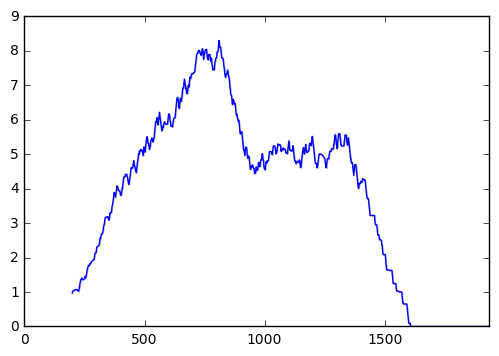

In [253]:
sns.tsplot(pd.rolling_mean(df_data_with_thetas_sorted['scar_width'],200)) # Uses mean windowing=100, so 0 widths are smoothed